<a href="https://colab.research.google.com/github/uranchung/SimpleCalcGDD-Kor/blob/circleci-project-setup/test_250205_PGA_GDD_exercise_draft_(Kor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Growing Degree Days (Exercise)**
생장도일(Growing Degree Day, GDD)는 작물의 생장과 발달을 예측하거나 특정 생물학적 이벤트를 이해하기 위해 사용하는 농업 및 생물학적 지표로 가장 간단한 형태의 열온도 모형입니다. GDD는 주어진 기간 동안 온도가 특정 기준을 초과한 정도를 측정한 값으로, 작물이 생장하기에 필요한 열량을 추적하는 데 유용합니다.

특정 온도($T$)에 대해 작물이 반응하여 생장하는 정도(growing degree)는 기본적으로 해당 온도와 기준 온도($T_{base}$) 간의 차이를 의미하며, 최적 온도($T_{opt}$) 이상에서는 더 이상 증가하지 않습니다. 또한, 음수가 되지 않도록 0에서 더 이상 내려가지 않습니다. 이러한 온도 차이를 일 단위 기준으로 계산하고(growing degree **days**), 그 단위는 $K d^{-1}$ (혹은 섭씨 온도) 로 정의할 수 있습니다.

이를 장기간에 걸쳐 적산한 값(cumulative growing degree days)을 **적산온도** 혹은 **생장도일**이라고 부르며, 주로 특정 발달 과정(예, 출수기 혹은 성숙기 등)에 도달하는 기준으로 사용됩니다.



1.   GDD 계산  
GDD는 하루 동안의 평균 기온이 작물의 기준 온도(base temperature) 이상일 때, 초과한 온도를 누적하여 계산합니다. 기준 온도는 작물에 따라 다르지만, 일반적으로 10°C(50°F)로 설정됩니다. GDD는 다음 공식을 사용해 계산됩니다:  
※(이 문장 삭제?) 적산하기 전의 단위 값과 적산한 후의 값을 모두 GDD라고 혼용하여 부르기도 하는데 여기서는 헷갈리지 않도록 이들을 구분하여 모형을 만들어 보겠습니다.  

\begin{align}
\mathrm{GD}(T) &= \max \{ 0, \min \{ T, T_{opt} \} - T_{base} \} \\
\mathrm{GDD}(T) &= \frac{\mathrm{GD}(T)}{1\ d} \\
\mathrm{cGDD} &= \sum_i^n \mathrm{GDD}(T_i) \\
\end{align}  




2.   GDD 활용  


*   작물 생장 예측: 특정 작물이 발아, 개화, 수확 준비 등 주요 생장 단계에 도달하는 시점을 예측합니다.
*   해충 관리: 해충이나 병원균의 발생 및 활동 시기를 예측하여 방제 시기를 조율합니다.
*   품종 선택: 지역별로 누적 GDD를 기반으로 적합한 작물을 선택합니다.



3.   GDD 한계

*   극한 온도: 기준 온도를 초과하더라도 너무 높은 온도에서는 작물 생장이 저하될 수 있지만 GDD는 이를 반영하지 않습니다.
*   기후 요인 무시: 습도, 일조량, 토양 조건 등 다른 환경 요인은 고려하지 않습니다.

**이러한 한계에도 불구하고, GDD는 간단하고 실용적인 생장 예측 도구로 널리 사용됩니다.**



4.   작물별 기준온도  
다음은 주요 식량작물의 **기준 온도(Base Temperature)**를 정리한 표입니다. 기준 온도는 작물의 생장이 시작되는 최소 온도로, 생리학적 특성과 지역적 조건에 따라 달라질 수 있습니다.

표. 작물별 기준온도  

<img src = "https://drive.google.com/uc?id=17tkKp9AU-wcQ363ObyDh49EUG46_w1cT" height="325" width="550"/>

생육단계별 도달하는 온도를 **누적온도(Cumulative GDD or Accumulated GDD)**라고 합니다.  
이번 실습에서는 옥수수의 생육단계별 필요 누적온도를 보겠습니다.

표. 옥수수의  생육단계별 필요 누적온도  

<img src = "https://drive.google.com/uc?id=1RZ7xb1_wYobXvVBI9Zwdxk0wsRWXkDob" height="325" width="550"/>

이제부터 GDD를 계산해 보겠습니다. 먼저, GDD를 계산하기 위해서는 기상 자료에서 일 최고 및 최저기온이 필요하다는 것은 위에서 이미 설명했습니다.

원하는 지역의 기후 혹은 기상 자료는 본인의 연구 환경에 맞게 정리를 해야 합니다.
페루 지역의 다년간의 기후 혹은 기상 자료로 실습하면 좋겠지만, 구할 수 없기 때문에, 실습은 한국의 기상 자료로 준비했습니다.

예제 파일로 사용할 기상자료(point 기반)는 100여개의 종관기상관측소(AWS는 제외) 중 일부 관측소(12개)에 대해 2가지 종류의 기후 및 기상자료입니다.  
첫번째는 1991-2020년 동안 12개 관측소에서 관측된 일별 최고기온과 일별 최저기온 자료입니다.  
두번째는 동일 기간인 1991-2020년, 즉 30년 동안의 평년 자료로 30년 평년에 대한 365일의 일별 최고기온과 일별 최저기온 자료입니다. 기온의 단위는 섭씨입니다.

# **CoLab에서 실습하기**

**실습하기 위해서 구글 드라이브를 마운트 해야 합니다.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


실습할 main 폴더를 "**2025_PGA_GDD_Exercise**" 라고 만들고, 이 폴더에는 실습할 기상자료를 넣어둘 "**weather_data_GDD**" sub 폴더를 만들고, 실습에 필요한 파일들을 이 폴더에 넣겠습니다. 그리고 실습하면서 생성된 output 파일들을 저장할 sub 폴더, "**results_GDD**"를 만들겠습니다.

In [ ]:
mount_Dir = '/content/gdrive/My Drive/Colab Notebooks/'
print(mount_Dir)

/content/gdrive/My Drive/Colab Notebooks/


In [ ]:
main_Dir = mount_Dir + '2025_PGA_GDD_Exercise/'
print(main_Dir)

/content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/


In [ ]:
weather_Dir = main_Dir + 'weather_data_GDD/'
print(weather_Dir)
results_Dir = main_Dir + 'results_GDD/'
print(results_Dir)

/content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/weather_data_GDD/
/content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/


엑셀 파일을 그냥 탐색기에서 열어볼까요?


엑셀 파일을 읽기 위해서는 먼저 pandas라는 라이브러리를 import해야 합니다.

In [ ]:
import pandas as pd

In [ ]:
## 엑셀 파일 경로
input_file = weather_Dir + 'obs_asos_1991-2020(30)_stns12_dtx_dtn.xlsx'

In [ ]:
## 지점 정보 데이터 읽기
df_asos = pd.read_excel(input_file)

In [ ]:
## 데이터 확인
print(df_asos.head())  ## 상위 5개 행 출력

   STNID  Latitude  Longitude       TIME  TMAX  TMIN
0     90   38.2509   128.5647 1991-01-01   8.5   0.1
1     90   38.2509   128.5647 1991-01-02   1.6  -6.3
2     90   38.2509   128.5647 1991-01-03   0.7  -6.6
3     90   38.2509   128.5647 1991-01-04  -2.5  -8.9
4     90   38.2509   128.5647 1991-01-05  -3.0 -10.4


이 파일은 1991-2020년 30년 동안 12개 관측소에서 매일 관측된 일별 최고기온과 최저기온으로, 왼쪽부터 컬럼이 기상관측소 번호, 위경도 정보, 날짜(즉, 시간), 일별 최고 및 최저기온입니다. sheet를 지정하지 않았기 때문에, 첫번째 sheet를 읽었습니다.  
원하는 sheet를 한번 읽어볼까요?

In [ ]:
## 시트를 읽기
sheet_name = '2010'  ## 읽고자 하는 시트 이름

## 데이터 읽기
df_asos = pd.read_excel(input_file, sheet_name=sheet_name)

In [ ]:
## 데이터 확인
print(df_asos.head())  ## 상위 5개 행 출력

   STNID  Latitude  Longitude       TIME  TMAX  TMIN
0     90   38.2509   128.5647 2010-01-01   0.3  -8.8
1     90   38.2509   128.5647 2010-01-02   3.7  -2.5
2     90   38.2509   128.5647 2010-01-03   1.8  -6.4
3     90   38.2509   128.5647 2010-01-04   0.2  -5.6
4     90   38.2509   128.5647 2010-01-05   0.0  -7.8


In [ ]:
## 모든 시트를 딕셔너리 형태로 불러오기
df_asos = pd.read_excel(input_file, sheet_name=None)

In [ ]:
## 마지막 시트의 이름 가져오기
last_sheet_name = list(df_asos.keys())[-1]

## 첫 번째 시트의 이름 가져오기
#first_sheet_name = list(sheets.keys())[0]

In [ ]:
## 마지막 시트 데이터 가져오기
df_last = df_asos[last_sheet_name]
print(df_last)

      STNID  Latitude  Longitude       TIME  TMAX  TMIN
0        90   38.2509   128.5647 2020-01-01   4.8  -3.4
1        90   38.2509   128.5647 2020-01-02   6.6  -2.1
2        90   38.2509   128.5647 2020-01-03   8.5   0.8
3        90   38.2509   128.5647 2020-01-04   8.1   1.1
4        90   38.2509   128.5647 2020-01-05   8.8  -0.6
...     ...       ...        ...        ...   ...   ...
4387    184   33.5141   126.5297 2020-12-27  11.5   8.1
4388    184   33.5141   126.5297 2020-12-28  14.5   8.3
4389    184   33.5141   126.5297 2020-12-29  14.6   3.0
4390    184   33.5141   126.5297 2020-12-30   4.3  -1.4
4391    184   33.5141   126.5297 2020-12-31   4.6  -0.3

[4392 rows x 6 columns]


sheet 정보를 확인했고, 기온의 단위가 섭씨인 것을 확인했습니다. 앞서 설명한 대로 임의 작물의 GDD를 계산하기 위해서는 그 작물에 대한 기준온도가 필요하다고 했습니다.  
옥수수는 세계적으로 많이 재배되는 작물입니다. 한국에서도 많이 재배되기는 하지만 주요 작물은 아닙니다.  
페루에서는 옥수수가 주요 작물인 것으로 압니다. 그래서 이번 실습을 옥수수로 하겠습니다. 옥수수의 기준온도를 위의 표에서 보겠습니다.  
옥수수의 기준온도는 10도 입니다.

In [ ]:
## GDD 계산 기준 온도
T_base = 10

In [ ]:
## 필터링 및 병합된 데이터를 저장할 딕셔너리
df_final_sheets = {}

GDD는 매일 매일의 최고기온과 최저기온으로부터 계산된다고 했습니다. 또한 매일 매일의 GDD가 누적이 되면 이것이 적산온도(누적 GDD)가 됩니다.
누적 GDD가 필요한 이유는, 앞서 설명한 대로, 생육과 발육 및 성숙에 대한 정보를 보기 위해서는 적산온도가 필요합니다.

그래서 적산온도, 즉 매일 매일의 GDD를 누적하는 것도 동시에 코딩하겠습니다.
또한, 기상 자료 엑셀 파일에 있는 모든 sheet에서 GDD를 계산하기 위해서는 루프 구문을 이용합니다.

In [ ]:
for sheet_name, df in df_asos.items():
    ## GDD 계산
    df['Base10C_GDD'] = ((df['TMAX'] + df['TMIN']) / 2 - T_base).clip(lower=0)

    ## 누적 GDD 계산 (지점별)
    df['Accumulated_GDD'] = df.groupby('STNID')['Base10C_GDD'].cumsum()

    ## 필요한 열 선택 ('일시'와 GDD 포함)
    df_final_sheets[sheet_name] = df[['STNID', 'Latitude', 'Longitude', 'TIME', 'TMAX', 'TMIN', 'Base10C_GDD', 'Accumulated_GDD']]

계산된 sheet의 GDD를 볼까요. 연도 sheet를 지정하지 않으면, 너무 많은 정보가 출력되므로, sheet를 지정해서 보겠습니다.  
2010년 sheet를 보겠습니다.  
매일 매일의 GDD 옆 컬럼에 누적온도도 계산된 것을 확인했습니다.

In [ ]:
print(df_final_sheets['2010'])

      STNID  Latitude  Longitude       TIME  TMAX  TMIN  Base10C_GDD  \
0        90   38.2509   128.5647 2010-01-01   0.3  -8.8          0.0   
1        90   38.2509   128.5647 2010-01-02   3.7  -2.5          0.0   
2        90   38.2509   128.5647 2010-01-03   1.8  -6.4          0.0   
3        90   38.2509   128.5647 2010-01-04   0.2  -5.6          0.0   
4        90   38.2509   128.5647 2010-01-05   0.0  -7.8          0.0   
...     ...       ...        ...        ...   ...   ...          ...   
4375    184   33.5141   126.5297 2010-12-27   9.3   4.6          0.0   
4376    184   33.5141   126.5297 2010-12-28  11.2   4.6          0.0   
4377    184   33.5141   126.5297 2010-12-29   7.5   4.3          0.0   
4378    184   33.5141   126.5297 2010-12-30   8.7  -0.4          0.0   
4379    184   33.5141   126.5297 2010-12-31   3.1  -0.6          0.0   

      Accumulated_GDD  
0                0.00  
1                0.00  
2                0.00  
3                0.00  
4              

계산된 데이터를 저장한다면, output file 이름 정의가 필요하고, 연도별로 저장해야 하므로, 역시 루프 구문이 필요합니다.

In [ ]:
## 저장할 파일 이름을 입력하세요.
asos_gdd_output = results_Dir + "asos_1991-2020(30)_Calc_Summed_base10C_GDD.xlsx"

In [ ]:
## 여러 시트로 저장
with pd.ExcelWriter(asos_gdd_output) as writer:
    for sheet_name, df_final in df_final_sheets.items():
        df_final.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"필터링된 데이터가 {asos_gdd_output} 파일의 여러 시트에 저장되었습니다.")

필터링된 데이터가 /content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/asos_1991-2020(30)_Calc_Summed_base10C_GDD.xlsx 파일의 여러 시트에 저장되었습니다.


계산된 매일 매일 GDD와 누적 GDD가 저장된 엑셀 파일을 열어볼까요?  
매일 매일의 계산된 GDD는 'G' 컬럼이고, 누적된 GDD는 'H' 컬럼입니다.

옥수수의 생육단계별 필요 누적온도(적산온도)는 표와 같습니다.

표. 옥수수의 생육단계별 필요 누적온도  

<img src = "https://drive.google.com/uc?id=1RZ7xb1_wYobXvVBI9Zwdxk0wsRWXkDob" height="325" width="550"/>

표에서 보는 바와 같이 옥수수가 영양생장하기 까지 필요한 적산온도는 300에서 500도가 필요하고, 수정되기까지 필요한 누적온도는 700에서 900도가 필요하고, 완숙하는데까지 필요한 누적온도는 1,300에서 1,500도 입니다.
우리는 여기서 두 단계, 영양생장기와 수확인 가능한 완숙기까지 필요한 누적온도를 계산하고 그 필요 누적온도에 도달하는 날짜를 추정하겠습니다.

옥수수에서, 수정기의 필요 누적온도를 700에서 900도의 중간인 800도로 설정하고,  
완숙기까지 필요한 누적온도는 1,300에서 1,500도의 사이인 1,400도로 설정하겠습니다.

위 코드에서 df_final_sheets에도 데이터가 현재 메모리에 있고, 엑셀 파일로도 저장이 되어 있는데, 저장된 엑셀 파일에서 읽어서 필요 누적온도를 찾아도 되고, df_final_sheets로부터 찾아도 됩니다. 아직 메모리에 있으므로 이번 실습에서는 df_final_sheets에서 읽겠습니다.

In [ ]:
## 연도별 데이터 저장할 딕셔너리 (연도별로 GDD_800, GDD_1400 데이터 저장)
gdd_800_by_year = {}
gdd_1400_by_year = {}

In [ ]:
## 연도별로 데이터 처리
for year in range(1991, 2021):
    sheet_name = str(year)

    ## 시트 읽기
    try:
        df = df_final_sheets[sheet_name]

        ## STNID별로 데이터를 처리
        for stnid, group in df.groupby('STNID'):

            ## 800과 1400에 도달하는 TIME 찾기
            time_800 = group[group['Accumulated_GDD'] >= 800].iloc[0] if not group[group['Accumulated_GDD'] >= 800].empty else None
            time_1400 = group[group['Accumulated_GDD'] >= 1400].iloc[0] if not group[group['Accumulated_GDD'] >= 1400].empty else None

            ## 결과 저장 (없으면 추가 안함)
            if time_800 is not None:
                gdd_800_by_year.setdefault(year, []).append([stnid, time_800['Latitude'], time_800['Longitude'], time_800['TIME'], time_800['Accumulated_GDD']])
            if time_1400 is not None:
                gdd_1400_by_year.setdefault(year, []).append([stnid, time_1400['Latitude'], time_1400['Longitude'], time_1400['TIME'], time_1400['Accumulated_GDD']])

    except ValueError:
        ## 만약 해당 연도의 시트가 없다면 예외 처리
        print(f"{sheet_name} 시트를 찾을 수 없습니다.")

In [ ]:
#print(time_800)

800과 1400에 도달한 날짜를 연도별 sheet로 정리하겠습니다.

엑셀 파일로 저장해서 열어보겠습니다. 저장할 파일명의 정의가 필요합니다.

In [ ]:
## 저장할 파일 이름을 입력하세요.
gdd_Date_output = results_Dir + "asos_1991-2020(30)_base10C_GDD_800_1400_Find_date.xlsx"

연도별 sheet로 정리하여 저장하기 위해서는 역시 루프 구문이 필요합니다.

In [ ]:
## 새로운 엑셀 파일로 저장
#with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
with pd.ExcelWriter(gdd_Date_output) as writer:
    ## 연도별로 시트 생성ㄴ
    for year in range(1991, 2021):
        ## GDD_800 시트에 데이터 저장
        if year in gdd_800_by_year:
            df_800 = pd.DataFrame(gdd_800_by_year[year], columns=['STNID', 'Latitude', 'Longitude', 'TIME', 'Accumulated_GDD'])
            df_800.to_excel(writer, sheet_name=f'{year}_GDD_800', index=False)

        ## GDD_1400 시트에 데이터 저장
        if year in gdd_1400_by_year:
            df_1400 = pd.DataFrame(gdd_1400_by_year[year], columns=['STNID', 'Latitude', 'Longitude', 'TIME', 'Accumulated_GDD'])
            df_1400.to_excel(writer, sheet_name=f'{year}_GDD_1400', index=False)

print(f"'800 도달 요약'과 '1400 도달 요약' 이 '{gdd_Date_output}'에 저장되었습니다.")

'800 도달 요약'과 '1400 도달 요약' 이 '/content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/asos_1991-2020(30)_base10C_GDD_800_1400_Find_date.xlsx'에 저장되었습니다.


In [ ]:
print(df_800)

    STNID  Latitude  Longitude       TIME  Accumulated_GDD
0      90   38.2509   128.5647 2020-07-11           802.80
1     100   37.6771   128.7183 2020-08-15           811.65
2     108   37.5714   126.9658 2020-07-02           800.40
3     119   37.2575   126.9830 2020-07-07           807.65
4     127   36.9705   127.9525 2020-07-08           806.80
5     133   36.3720   127.3721 2020-06-30           807.20
6     143   35.8780   128.6530 2020-06-25           801.15
7     156   35.1729   126.8916 2020-06-28           804.05
8     159   35.1047   129.0320 2020-06-30           808.90
9     165   34.8173   126.3815 2020-07-11           804.20
10    168   34.7393   127.7406 2020-07-03           805.45
11    184   33.5141   126.5297 2020-06-23           807.60


연도별로 분리되었는지 확인해보는데, (위: 루프(반복) 구문이라 마지막 자료만 보임. 그래서 연도를 지정해 봄)

In [ ]:
print(gdd_800_by_year[1991])

[[90, 38.2509, 128.5647, Timestamp('1991-07-21 00:00:00'), 811.25], [100, 37.6771, 128.7183, Timestamp('1991-09-06 00:00:00'), 802.5], [108, 37.5714, 126.9658, Timestamp('1991-07-04 00:00:00'), 809.95], [119, 37.2575, 126.983, Timestamp('1991-07-08 00:00:00'), 801.25], [127, 36.9705, 127.9525, Timestamp('1991-07-05 00:00:00'), 801.55], [133, 36.372, 127.3721, Timestamp('1991-07-03 00:00:00'), 805.5], [143, 35.878, 128.653, Timestamp('1991-06-28 00:00:00'), 808.6], [156, 35.1729, 126.8916, Timestamp('1991-07-01 00:00:00'), 811.1], [159, 35.1047, 129.032, Timestamp('1991-07-08 00:00:00'), 811.8], [165, 34.8173, 126.3815, Timestamp('1991-07-05 00:00:00'), 800.1], [168, 34.7393, 127.7406, Timestamp('1991-07-09 00:00:00'), 809.0500000000001], [184, 33.5141, 126.5297, Timestamp('1991-07-06 00:00:00'), 812.5]]


In [ ]:
print(gdd_800_by_year[2020])

[[90, 38.2509, 128.5647, Timestamp('2020-07-11 00:00:00'), 802.8], [100, 37.6771, 128.7183, Timestamp('2020-08-15 00:00:00'), 811.65], [108, 37.5714, 126.9658, Timestamp('2020-07-02 00:00:00'), 800.4], [119, 37.2575, 126.983, Timestamp('2020-07-07 00:00:00'), 807.65], [127, 36.9705, 127.9525, Timestamp('2020-07-08 00:00:00'), 806.8000000000001], [133, 36.372, 127.3721, Timestamp('2020-06-30 00:00:00'), 807.2], [143, 35.878, 128.653, Timestamp('2020-06-25 00:00:00'), 801.15], [156, 35.1729, 126.8916, Timestamp('2020-06-28 00:00:00'), 804.05], [159, 35.1047, 129.032, Timestamp('2020-06-30 00:00:00'), 808.9], [165, 34.8173, 126.3815, Timestamp('2020-07-11 00:00:00'), 804.2], [168, 34.7393, 127.7406, Timestamp('2020-07-03 00:00:00'), 805.45], [184, 33.5141, 126.5297, Timestamp('2020-06-23 00:00:00'), 807.6]]


누적 GDD 800과 누적 GDD 1400에 도달한 날짜를 선 그래프로 그려보겠습니다. 지점별로 색을 다른 색상을 설정하고 그래프를 그리기 위해 matplotlib 라이브러리 설정이 필요합니다.

날짜를 day of year로 변환해서 저장할 딕셔너리가 필요합니다.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # 날짜 포맷 설정을 위해 추가

In [ ]:
## GDD 800과 GDD 1400에 도달한 날짜의 day of year를 저장할 딕셔너리
gdd_800_dates = {}
gdd_1400_dates = {}

## 색상 리스트를 생성 (모든 STNID에 대해 다른 색상을 지정)
colors = plt.cm.get_cmap('tab10', 20)  ## 최대 20개의 색상

<ipython-input-31-24d1928619d8>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 20)  ## 최대 20개의 색상


In [ ]:
## 연도별로 데이터 처리
for year in range(1991, 2021):
    sheet_name_800 = f'{year}_GDD_800'  # 예: 1991_GDD_800
    sheet_name_1400 = f'{year}_GDD_1400'  # 예: 1991_GDD_1400

    try:
        ## GDD_800 시트 읽기
        day_800 = pd.read_excel(gdd_Date_output, sheet_name=sheet_name_800)
        ## GDD_1400 시트 읽기
        day_1400 = pd.read_excel(gdd_Date_output, sheet_name=sheet_name_1400)

        ## 각 시트에서 STNID별로 GDD_800과 GDD_1400에 도달한 날짜 추출
        for stnid, group_800 in day_800.groupby('STNID'):
            time_800 = group_800[group_800['Accumulated_GDD'] >= 800].iloc[0] if not group_800[group_800['Accumulated_GDD'] >= 800].empty else None
            time_1400 = day_1400[day_1400['STNID'] == stnid]
            time_1400 = time_1400[time_1400['Accumulated_GDD'] >= 1400].iloc[0] if not time_1400[time_1400['Accumulated_GDD'] >= 1400].empty else None

            ## GDD 800에 도달한 날짜 (Day of Year)
            if time_800 is not None:
                day_of_year_800 = time_800['TIME'].dayofyear
                gdd_800_dates.setdefault(stnid, []).append((day_of_year_800, time_800['TIME']))

            ## GDD 1400에 도달한 날짜 (Day of Year)
            if time_1400 is not None:
                day_of_year_1400 = time_1400['TIME'].dayofyear
                gdd_1400_dates.setdefault(stnid, []).append((day_of_year_1400, time_1400['TIME']))

    except ValueError:
        print(f"{sheet_name_800} 또는 {sheet_name_1400} 시트를 찾을 수 없습니다.")

In [ ]:
#print(day_of_year_800)

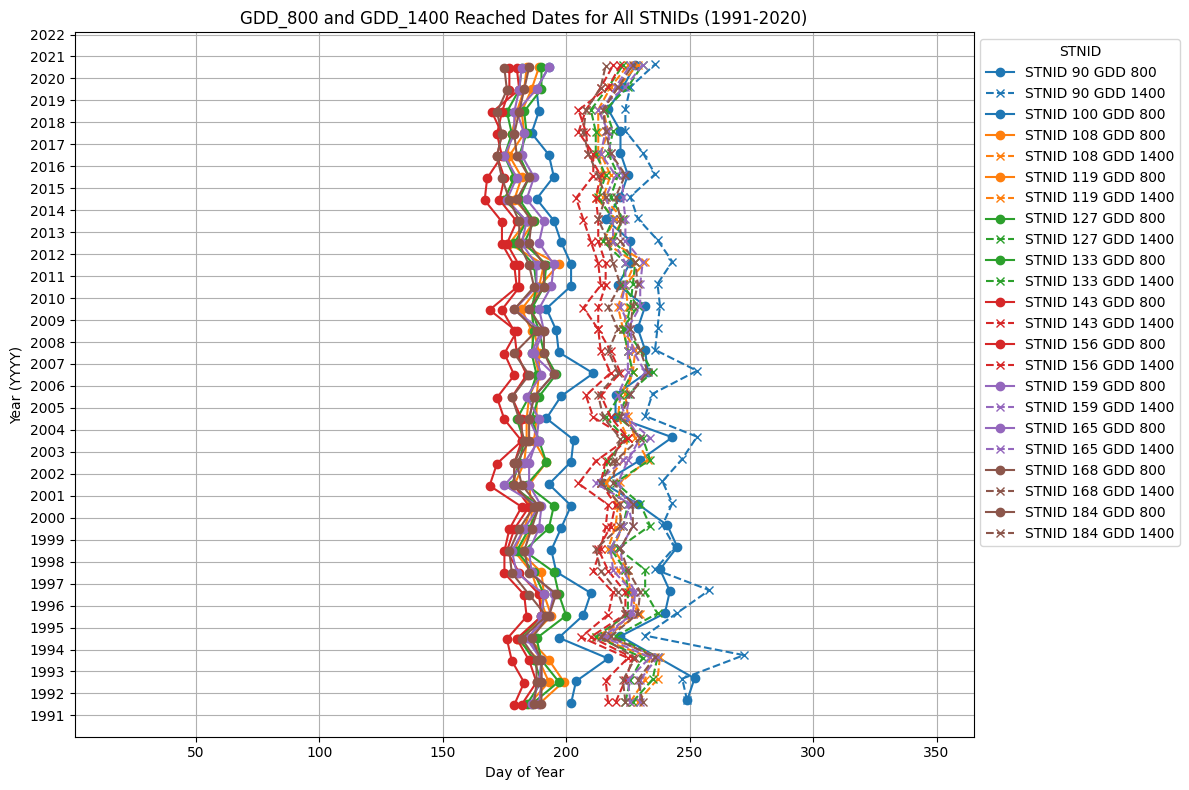

In [ ]:
## 그래프 그리기
plt.figure(figsize=(12, 8))

## 각 STNID에 대해 GDD_800과 GDD_1400에 도달한 날짜 라인 그래프 그리기
for idx, stnid in enumerate(gdd_800_dates):
    ## GDD_800에 도달한 날짜
    dates_800 = gdd_800_dates[stnid]
    days_800, times_800 = zip(*dates_800)

    ## GDD_1400에 도달한 날짜
    dates_1400 = gdd_1400_dates.get(stnid, [])
    if dates_1400:
        days_1400, times_1400 = zip(*dates_1400)
    else:
        days_1400, times_1400 = [], []

    ## 색상 설정 (컬러맵에서 가져오기)
    color = colors(idx)

    ## GDD_800 라인
    plt.plot(days_800, times_800, marker='o', linestyle='-', label=f"STNID {stnid} GDD 800", color=color)

    ## GDD_1400 라인
    if days_1400:
        plt.plot(days_1400, times_1400, marker='x', linestyle='--', label=f"STNID {stnid} GDD 1400", color=color)

## Y축을 연도(YYYY)만 표시
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y'))  ## 연도(YYYY) 형식만 표시
plt.gca().yaxis.set_major_locator(mdates.YearLocator())  ## 연도 단위로 눈금 표시

## 그래프 타이틀 및 레이블 설정
plt.title("GDD_800 and GDD_1400 Reached Dates for All STNIDs (1991-2020)")
plt.xlabel("Day of Year")
#plt.ylabel("Year")
plt.ylabel("Year (YYYY)")  ## Y축 레이블을 "Year (YYYY)"로 변경

## X축 범위 설정 (1~365)
plt.xlim(1, 365)

## 레이블 및 그리드 추가
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="STNID")
plt.grid(True)

## 레이아웃 조정
plt.tight_layout()
plt.savefig(results_Dir + 'asos_1991-2020(30)_base10C_GDD_800_1400_reached_date.png', dpi=300)
plt.show()

STNID 100은 대관령인데, 우리나라 백두대간에 위치한 고도가 높은 지역이라 1400에 도달을 못하는 것으로 추정됩니다.  
수정기 도달은 대부분 7월 초(7월 첫번째 주 정도거나 빠르면 6월 말) 성숙기 도달은 대략 8월 중순(8월 둘째 주)입니다. 대략 1개월의 간격이 보입니다.

이렇게 30년 동안 관측 일별 최고기온과 최저기온으로 옥수수 생육단계 정보를 추정할 수 있는 누적 GDD를 계산하여 연도별 추이를 확인했습니다.
이들 지점의 30년 동안 생육에 도달하는 날짜가 평년보다 빨라지는지 늦어지는에 대한 평가를 위해서는 평년 기후 자료로부터 누적 GDD를 계산해서 비교해야 합니다.

두번째는 1991-2020년 평년 동안의 365일의 일 최고기온과 일 최저기온입니다. 엑셀 파일을 열어보고, 읽어보겠습니다.

왼쪽부터 컬럼이 기상관측소 번호, 위경도 정보, 일별 최고 및 최저기온입니다. 매일에 대한 30년 평균이기 때문에 지점에 대해 365일만 있습니다.

In [ ]:
## 평년 기후 엑셀 파일 경로
normal_file = weather_Dir + 'Normal(30)1991-2020_STN12_DTMAX_DTMIN.xlsx'

In [ ]:
df_normal = pd.read_excel(normal_file)

In [ ]:
print(df_normal)

      STNID  Latitude  Longitude     Date  TMAX  TMIN
0        90   38.2509   128.5647    1월 1일   5.1  -3.1
1        90   38.2509   128.5647    1월 2일   4.9  -3.2
2        90   38.2509   128.5647    1월 3일   4.9  -3.2
3        90   38.2509   128.5647    1월 4일   5.0  -3.2
4        90   38.2509   128.5647    1월 5일   4.8  -3.4
...     ...       ...        ...      ...   ...   ...
4021    184   33.5141   126.5297  12월 27일   9.6   4.6
4022    184   33.5141   126.5297  12월 28일   9.4   4.5
4023    184   33.5141   126.5297  12월 29일   9.4   4.2
4024    184   33.5141   126.5297  12월 30일   9.3   4.2
4025    184   33.5141   126.5297  12월 31일   9.5   4.3

[4026 rows x 6 columns]


위에서 ASOS 기상 자료에 매일 매일의 GDD를 계산하여 TMAX, TMIN 컬럼 옆에 저장하고, 누적 GDD도 계산해서 매일 매일의 GDD 옆에 저장했습니다.  같은 방법으로 평년에 대한 매일 매일의 GDD와 누적 GDD를 계산하겠습니다.

In [ ]:
## 변환된 데이터를 저장할 딕셔너리
sheets_dict = {}

In [ ]:
df_normal['Base10C_GDD'] = ((df_normal['TMAX'] + df_normal['TMIN']) / 2 - T_base).clip(lower=0)

## 누적 GDD 계산 (STNID가 바뀌면 초기화)
df_normal['Cumulative_GDD'] = df_normal.groupby('STNID')['Base10C_GDD'].cumsum()

## 결과 저장
sheets_dict[sheet_name] = df_normal

In [ ]:
print(df_normal)

      STNID  Latitude  Longitude     Date  TMAX  TMIN  Base10C_GDD  \
0        90   38.2509   128.5647    1월 1일   5.1  -3.1          0.0   
1        90   38.2509   128.5647    1월 2일   4.9  -3.2          0.0   
2        90   38.2509   128.5647    1월 3일   4.9  -3.2          0.0   
3        90   38.2509   128.5647    1월 4일   5.0  -3.2          0.0   
4        90   38.2509   128.5647    1월 5일   4.8  -3.4          0.0   
...     ...       ...        ...      ...   ...   ...          ...   
4021    184   33.5141   126.5297  12월 27일   9.6   4.6          0.0   
4022    184   33.5141   126.5297  12월 28일   9.4   4.5          0.0   
4023    184   33.5141   126.5297  12월 29일   9.4   4.2          0.0   
4024    184   33.5141   126.5297  12월 30일   9.3   4.2          0.0   
4025    184   33.5141   126.5297  12월 31일   9.5   4.3          0.0   

      Cumulative_GDD  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ... 

TMAX와 TMIN 컬럼 옆에 기준온도 10도에 대한 매일 매일의 GDD와 누적 GDD가 계산된 것을 확인할 수 있습니다.  
위 파일을 저장해보겠습니다.

In [ ]:
## 저장할 파일 이름을 입력하세요.
normal_GDD_output = results_Dir + "normal(1991-2020)_stn12_Calc_Cumulative_base10C_GDD.xlsx"

평년 자료에서는 sheet 이름을 지정해보겠습니다.

In [ ]:
## 수정된 데이터를 새 엑셀 파일로 저장
with pd.ExcelWriter(normal_GDD_output) as writer:
    #for sheet_name, df in sheets_dict.items():
    df_normal.to_excel(writer, sheet_name='Normal1991-2020', index=False)

print(f"GDD 계산 완료. 결과가 {normal_GDD_output}에 저장되었습니다.")

GDD 계산 완료. 결과가 /content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/normal(1991-2020)_stn12_Calc_Cumulative_base10C_GDD.xlsx에 저장되었습니다.


12개 지점의 365일에 대한 매일 매일의 GDD와 누적 GDD가 계산되었습니다.  누적 GDD가 800과 1400에 도달했을 때의 날짜를 뽑아보겠습니다.

In [ ]:
## GDD 800에 도달한 첫 번째 날짜 찾기
gdd_800 = df_normal[df_normal["Cumulative_GDD"] >= 800].groupby("STNID").first().reset_index()
gdd_800 = gdd_800[["STNID", "Latitude", "Longitude", "Date", "Cumulative_GDD"]]

## GDD 1400에 도달한 첫 번째 날짜 찾기
gdd_1400 = df_normal[df_normal["Cumulative_GDD"] >= 1400].groupby("STNID").first().reset_index()
gdd_1400 = gdd_1400[["STNID", "Latitude", "Longitude", "Date", "Cumulative_GDD"]]

In [ ]:
print(gdd_800)

    STNID  Latitude  Longitude    Date  Cumulative_GDD
0      90   38.2509   128.5647  7월 19일          804.40
1     100   37.6771   128.7183  8월 20일          803.20
2     108   37.5714   126.9658   7월 4일          805.60
3     119   37.2575   126.9830   7월 8일          814.80
4     127   36.9705   127.9525   7월 9일          802.95
5     133   36.3720   127.3721   7월 4일          810.20
6     156   35.1729   126.8916   7월 1일          813.80
7     159   35.1047   129.0320   7월 5일          804.05
8     165   34.8173   126.3815   7월 8일          803.60
9     168   34.7393   127.7406   7월 7일          807.35
10    184   33.5141   126.5297   7월 2일          802.10


찾은 날짜가 있는 파일을 저장해보겠습니다.

In [ ]:
## 저장할 파일 이름을 입력하세요.
normal_GDD_Date_output = results_Dir + "normal(1991-2020)_base10C_GDD_800_1400_Find_Date.xlsx"

In [ ]:
## 새로운 엑셀 파일로 저장
with pd.ExcelWriter(normal_GDD_Date_output) as writer:
    gdd_800.to_excel(writer, sheet_name="GDD_800", index=False)
    gdd_1400.to_excel(writer, sheet_name="GDD_1400", index=False)

print(f"'800 도달 요약'과 '1400 도달 요약' 이 '{normal_GDD_Date_output}'에 저장되었습니다.")

'800 도달 요약'과 '1400 도달 요약' 이 '/content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/normal(1991-2020)_base10C_GDD_800_1400_Find_Date.xlsx'에 저장되었습니다.


위에서 ASOS 지점의 누적 GDD 800과 1400에 도달한 날짜를 선 그래프로 그려본 것과 같이 그려보겠습니다. 다른 점은, 평년은 30년의 평균으로 연도 개념이 없습니다. 그래서 Y축을 지점으로 두고 그려보겠습니다.

In [ ]:
## 날짜를 'Day of Year'로 변환
gdd_800['Date'] = pd.to_datetime(gdd_800['Date'], format='%m월 %d일')
gdd_800['Day_of_Year'] = gdd_800['Date'].dt.dayofyear

gdd_1400['Date'] = pd.to_datetime(gdd_1400['Date'], format='%m월 %d일')
gdd_1400['Day_of_Year'] = gdd_1400['Date'].dt.dayofyear

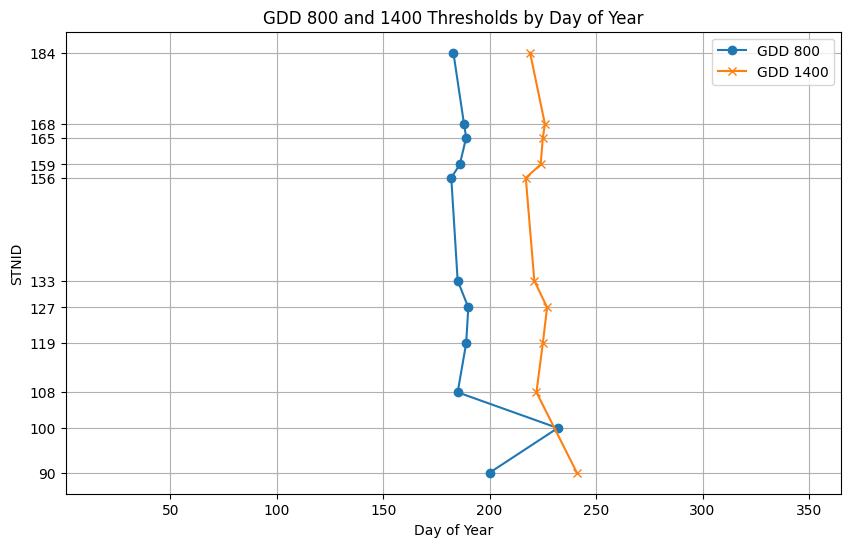

In [ ]:
## 선 그래프 그리기
plt.figure(figsize=(10, 6))

## GDD 800에 도달한 날짜 그래프
plt.plot(gdd_800['Day_of_Year'], gdd_800['STNID'], marker='o', linestyle='-', label='GDD 800')

## GDD 1400에 도달한 날짜 그래프
plt.plot(gdd_1400['Day_of_Year'], gdd_1400['STNID'], marker='x', linestyle='-', label='GDD 1400')

## 그래프 꾸미기
plt.xlabel('Day of Year')
plt.ylabel('STNID')
plt.title('GDD 800 and 1400 Thresholds by Day of Year')
plt.legend()
plt.grid(True)

## X축 범위 설정 (1~365)
plt.xlim(1, 365)

## Y축 눈금 설정 (STNID 번호)
plt.yticks(gdd_800['STNID'].unique())

## save fig
plt.savefig(results_Dir + 'normal(1991-2020)_base10C_GDD_800_1400_reached_date.png', dpi=300)

## 그래프 표시
plt.show()

이제 각각의 관측소별로 30년 동안의 매년의 옥수수의 누적 GDD에서 옥수수의 수정기와 성숙기에 도달하는 날짜를 얻었고, 평년 기후에 대해서도 옥수수의 수정기와 성숙기에 도달하는 날짜를 얻었습니다.  
그런데, 이 날짜는 캘린더 날짜와 날짜 차이를 계산하기 불편합니다. 그래서, 차이를 계산하기 위해서는 이것을 day of year(doy)라고 날짜를 365일로 변환하면 차이를 쉽게 계산할 수 있습니다.  
이제 날짜를 day of year로 변환하고, 각각의 관측소별 30년 동안의 매년 옥수수의 수정기와 성숙기에 도달한 날짜에서 평년에 도달한 날짜를 빼보겠습니다.

관측소별 매년 기후에서 도달한 날짜를 저장한 파일은 gdd_Date_output에 저장했지요. 파일명이 'asos_1991-2020(30)_base10C_GDD_800_1400_Find_date.xlsx' 이고,  
평년 기후에서 도달한 날짜를 저장한 파일은 normal_GDD_Date_output에 저장했지요. 파일명이 'normal(1991-2020)_base10C_GDD_800_1400_Find_Date.xlsx' 입니다.  
그 파일들을 읽어서 먼저 doy로 변환하겠습니다.

In [ ]:
## 저장된 GDD Find Date 엑셀 파일 읽기
asos_gdate_file = results_Dir + 'asos_1991-2020(30)_base10C_GDD_800_1400_Find_date.xlsx'
normal_gdate_file = results_Dir + 'normal(1991-2020)_base10C_GDD_800_1400_Find_Date.xlsx'

In [ ]:
## 엑셀 파일 읽기
xls_asos = pd.ExcelFile(asos_gdate_file)

## 연도 범위 설정
year_range = range(1991, 2021)

In [ ]:
## 모든 시트를 변환하여 저장
dfs_gdd_800 = {}

In [ ]:
for sheet_name in xls_asos.sheet_names:
    if any(str(year) in sheet_name for year in year_range) and "GDD_800" in sheet_name:  ## 연도 및 패턴 확인
        ## 엑셀 파일 읽기
        dfs_asos = pd.read_excel(asos_gdate_file, sheet_name=sheet_name)
        dfs_asos['TIME'] = pd.to_datetime(dfs_asos['TIME'])
        dfs_asos['DOY'] = dfs_asos['TIME'].dt.dayofyear
        dfs_gdd_800[sheet_name] = dfs_asos

In [ ]:
print(dfs_gdd_800['1998_GDD_800'].head())

   STNID  Latitude  Longitude       TIME  Accumulated_GDD  DOY
0     90   38.2509   128.5647 1998-07-13           800.65  194
1    100   37.6771   128.7183 1998-09-02           801.45  245
2    108   37.5714   126.9658 1998-06-28           814.55  179
3    119   37.2575   126.9830 1998-06-30           805.70  181
4    127   36.9705   127.9525 1998-07-02           808.80  183


DOY로 변환된 것을 확인할 수 있습니다. 1400에 도달한 날짜를 doy로 변환해보겠습니다.

In [ ]:
## 모든 시트를 변환하여 저장
dfs_gdd_1400 = {}

In [ ]:
for sheet_name in xls_asos.sheet_names:
    if any(str(year) in sheet_name for year in year_range) and "GDD_1400" in sheet_name:  ## 연도 및 패턴 확인
        ## 엑셀 파일 읽기
        dfs_asos2 = pd.read_excel(asos_gdate_file, sheet_name=sheet_name)
        dfs_asos2['TIME'] = pd.to_datetime(dfs_asos2['TIME'])
        dfs_asos2['DOY'] = dfs_asos2['TIME'].dt.dayofyear
        dfs_gdd_1400[sheet_name] = dfs_asos2

In [ ]:
print(dfs_gdd_1400['1998_GDD_1400'].head())

   STNID  Latitude  Longitude       TIME  Accumulated_GDD  DOY
0     90   38.2509   128.5647 1998-09-01          1408.20  244
1    108   37.5714   126.9658 1998-08-05          1400.90  217
2    119   37.2575   126.9830 1998-08-07          1406.75  219
3    127   36.9705   127.9525 1998-08-09          1400.50  221
4    133   36.3720   127.3721 1998-08-06          1401.45  218


변환된 dfs_gdd_800과 sfs_gdd_1400을 동일한 엑셀 파일에 모두 저장하겠습니다.

In [ ]:
## 저장할 파일 이름을 입력하세요.
asos_output_doy = results_Dir + "asos_1991-2020(30)_base10C_GDD_800_1400_Doy.xlsx"

In [ ]:
## 새로운 엑셀 파일로 저장
with pd.ExcelWriter(asos_output_doy) as writer:
    for sheet_name, df in dfs_gdd_800.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

    for sheet_name, df in dfs_gdd_1400.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Successfully saved {len(dfs_gdd_800) + len(dfs_gdd_1400)} sheets to {asos_output_doy}")

Successfully saved 60 sheets to /content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/asos_1991-2020(30)_base10C_GDD_800_1400_Doy.xlsx


이번에는 평년 자료에서 doy로 변환하겠습니다.

In [ ]:
xls_base = pd.ExcelFile(normal_gdate_file)
df_GDD_800 = pd.read_excel(xls_base, sheet_name='GDD_800')
df_GDD_1400 = pd.read_excel(xls_base, sheet_name='GDD_1400')

In [ ]:
print(df_GDD_800)

    STNID  Latitude  Longitude    Date  Cumulative_GDD
0      90   38.2509   128.5647  7월 19일          804.40
1     100   37.6771   128.7183  8월 20일          803.20
2     108   37.5714   126.9658   7월 4일          805.60
3     119   37.2575   126.9830   7월 8일          814.80
4     127   36.9705   127.9525   7월 9일          802.95
5     133   36.3720   127.3721   7월 4일          810.20
6     156   35.1729   126.8916   7월 1일          813.80
7     159   35.1047   129.0320   7월 5일          804.05
8     165   34.8173   126.3815   7월 8일          803.60
9     168   34.7393   127.7406   7월 7일          807.35
10    184   33.5141   126.5297   7월 2일          802.10


In [ ]:
## 'Date' 컬럼을 day of year로 변환 (GDD_800)
df_GDD_800['Date'] = pd.to_datetime(df_GDD_800['Date'], format='%m월 %d일', errors='coerce')
#df_GDD_800['Day_of_Year'] = df_GDD_800['Date'].dt.dayofyear
df_GDD_800['Normal_doy800'] = df_GDD_800['Date'].dt.dayofyear

In [ ]:
## NaT (결측치) 값이 있는지 확인
print(df_GDD_800[['Date', 'Normal_doy800']].head())

        Date  Normal_doy800
0 1900-07-19            200
1 1900-08-20            232
2 1900-07-04            185
3 1900-07-08            189
4 1900-07-09            190


In [ ]:
## 'Date' 컬럼을 day of year로 변환 (GDD_1400)
df_GDD_1400['Date'] = pd.to_datetime(df_GDD_1400['Date'], format='%m월 %d일', errors='coerce')
df_GDD_1400['Normal_doy1400'] = df_GDD_1400['Date'].dt.dayofyear

In [ ]:
## NaT (결측치) 값이 있는지 확인
print(df_GDD_1400[['Date', 'Normal_doy1400']].head())

        Date  Normal_doy1400
0 1900-08-29             241
1 1900-08-10             222
2 1900-08-13             225
3 1900-08-15             227
4 1900-08-09             221


In [ ]:
## 저장할 파일 이름을 입력하세요.
normal_output_doy = results_Dir + "normal(1991-2020)_base10C_GDD_800_1400_Doy.xlsx"

In [ ]:
## ExcelWriter 사용하여 두 개의 DataFrame을 서로 다른 시트로 저장
with pd.ExcelWriter(normal_output_doy) as writer:
    df_GDD_800.to_excel(writer, sheet_name='GDD_800', index=False)
    df_GDD_1400.to_excel(writer, sheet_name='GDD_1400', index=False)

print(f"Successfully saved {len(df_GDD_800) + len(df_GDD_1400)} sheets to {normal_output_doy}")

Successfully saved 21 sheets to /content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/normal(1991-2020)_base10C_GDD_800_1400_Doy.xlsx


평년에 대해 doy로 변환된 변수를 새 변수에 넣어서 작업하겠습니다.

In [ ]:
# Normal의 GDD_800 시트 로드
#b_df = pd.read_excel(b_file, sheet_name='GDD_800')
base_df = df_GDD_800

print(base_df)

    STNID  Latitude  Longitude       Date  Cumulative_GDD  Normal_doy800
0      90   38.2509   128.5647 1900-07-19          804.40            200
1     100   37.6771   128.7183 1900-08-20          803.20            232
2     108   37.5714   126.9658 1900-07-04          805.60            185
3     119   37.2575   126.9830 1900-07-08          814.80            189
4     127   36.9705   127.9525 1900-07-09          802.95            190
5     133   36.3720   127.3721 1900-07-04          810.20            185
6     156   35.1729   126.8916 1900-07-01          813.80            182
7     159   35.1047   129.0320 1900-07-05          804.05            186
8     165   34.8173   126.3815 1900-07-08          803.60            189
9     168   34.7393   127.7406 1900-07-07          807.35            188
10    184   33.5141   126.5297 1900-07-02          802.10            183


In [ ]:
## 저장할 파일 이름을 입력하세요.
output_800 = results_Dir + "asos_1991-2020(30)_base10C_GDD_800_Doy_Change.xlsx"

In [ ]:
with pd.ExcelWriter(output_800) as writer:
    for year in range(1991, 2021):  ## 1991 ~ 2020
        sheet_name = f'{year}_GDD_800'

        ## A 엑셀에서 해당 시트 읽기
        a_df = pd.read_excel(asos_output_doy, sheet_name=sheet_name)

        ## 'DOY'와 'Normal_doy800'의 차이 계산
        merged_df = pd.merge(a_df, base_df[['STNID', 'Latitude', 'Longitude', 'Normal_doy800']], on='STNID', how='inner')
        #print(merged_df)
        merged_df['DOY_diff800'] = merged_df['DOY'] - merged_df['Normal_doy800']

        ## Latitude, Longitude 컬럼이 있는지 확인 후 추가
        columns_to_include = ['STNID', 'DOY_diff800']
        for col in ['Latitude_x', 'Longitude_x']:
            if col in merged_df.columns:
                columns_to_include.insert(1, col)  ## 지점 다음에 추가

        ## 필요한 컬럼만 선택하여 저장
        result_df = merged_df[columns_to_include]

        ## 결과를 새로운 시트로 저장
        result_df.to_excel(writer, sheet_name=f'{year}_DOY_diff800', index=False)

print(f'결과가 {output_800}에 저장되었습니다.')

결과가 /content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/asos_1991-2020(30)_base10C_GDD_800_Doy_Change.xlsx에 저장되었습니다.


In [ ]:
print(result_df.head()) ## 이 경우는 제일 마지막 sheet를 읽음
#print(result_df['1991_DOY_diff800'].head())  ## 에러

   STNID  Longitude_x  Latitude_x  DOY_diff800
0     90     128.5647     38.2509           -7
1    100     128.7183     37.6771           -4
2    108     126.9658     37.5714           -1
3    119     126.9830     37.2575            0
4    127     127.9525     36.9705            0


In [ ]:
## Normal의 GDD_1400 시트 로드
base_df1400 = df_GDD_1400

print(base_df1400)

   STNID  Latitude  Longitude       Date  Cumulative_GDD  Normal_doy1400
0     90   38.2509   128.5647 1900-08-29         1403.00             241
1    108   37.5714   126.9658 1900-08-10         1409.75             222
2    119   37.2575   126.9830 1900-08-13         1412.25             225
3    127   36.9705   127.9525 1900-08-15         1402.30             227
4    133   36.3720   127.3721 1900-08-09         1403.55             221
5    156   35.1729   126.8916 1900-08-05         1400.10             217
6    159   35.1047   129.0320 1900-08-12         1404.55             224
7    165   34.8173   126.3815 1900-08-13         1403.25             225
8    168   34.7393   127.7406 1900-08-14         1412.55             226
9    184   33.5141   126.5297 1900-08-07         1411.20             219


In [ ]:
## 저장할 파일 이름을 입력하세요.
output_1400 = results_Dir + "asos_1991-2020(30)_base10C_GDD_1400_Doy_Change.xlsx"

In [ ]:
with pd.ExcelWriter(output_1400) as writer:
    for year2 in range(1991, 2021):  ## 1991 ~ 2020
        sheet_name2 = f'{year2}_GDD_1400'

        ## A 엑셀에서 해당 시트 읽기
        a_df = pd.read_excel(asos_output_doy, sheet_name=sheet_name2)

        ## 'DOY'와 'Normal_doy1400'의 차이 계산
        merged_df1400 = pd.merge(a_df, base_df1400[['STNID', 'Latitude', 'Longitude', 'Normal_doy1400']], on='STNID', how='inner')
        #print(merged_df1400)
        merged_df1400['DOY_diff1400'] = merged_df1400['DOY'] - merged_df1400['Normal_doy1400']

        ## Latitude, Longitude 컬럼이 있는지 확인 후 추가
        columns_to_include2 = ['STNID', 'DOY_diff1400']
        for col2 in ['Latitude_x', 'Longitude_x']:
            if col2 in merged_df1400.columns:
                columns_to_include2.insert(1, col2)  ## 지점 다음에 추가

        ## 필요한 컬럼만 선택하여 저장
        result_df1400 = merged_df1400[columns_to_include2]

        ## 결과를 새로운 시트로 저장
        result_df1400.to_excel(writer, sheet_name=f'{year2}_DOY_diff1400', index=False)

print(f'결과가 {output_1400}에 저장되었습니다.')

결과가 /content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/asos_1991-2020(30)_base10C_GDD_1400_Doy_Change.xlsx에 저장되었습니다.


In [ ]:
print(result_df1400.head())

   STNID  Longitude_x  Latitude_x  DOY_diff1400
0     90     128.5647     38.2509            -5
1    108     126.9658     37.5714             3
2    119     126.9830     37.2575             4
3    127     127.9525     36.9705             4
4    133     127.3721     36.3720             2


작업을 용이하게 하기 위해 두 개 파일을 결합해서, 한 개의 엑셀 파일로 만들어서 실습하겠습니다.

In [ ]:
## 저장할 파일 이름을 입력하세요.
gdate_doy_change_output = results_Dir + "asos_1991-2020(30)_base10C_GDD_800_1400_Doy_Change.xlsx"

In [ ]:
## 새 엑셀 파일 생성
with pd.ExcelWriter(gdate_doy_change_output) as writer:
    ## 첫 번째 파일(A.xlsx)의 모든 시트 추가
    xls_a = pd.ExcelFile(output_800)
    for sheet in xls_a.sheet_names:
        df_change = pd.read_excel(xls_a, sheet_name=sheet)
        df_change.to_excel(writer, sheet_name=sheet, index=False)

    ## 두 번째 파일(B.xlsx)의 모든 시트 추가
    xls_b = pd.ExcelFile(output_1400)
    for sheet in xls_b.sheet_names:
        df_change = pd.read_excel(xls_b, sheet_name=sheet)
        df_change.to_excel(writer, sheet_name=sheet, index=False)

print(f"병합된 엑셀 파일이 '{gdate_doy_change_output}'로 저장되었습니다.")

병합된 엑셀 파일이 '/content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/asos_1991-2020(30)_base10C_GDD_800_1400_Doy_Change.xlsx'로 저장되었습니다.


저장된 엑셀 파일 'asos_1991-2020(30)_base10C_GDD_800_1400_Doy_Change.xlsx'을 열어보겠습니다.  

<img src = "https://drive.google.com/uc?id=1WYeQM6WBaf8FWjxODeo6iiif70tjMw40" height="420" width="680"/>

'1991_DOY_diff800' sheet부터 '2020_DOY_diff800' sheet까지, '1991_DOY_diff1400' sheet에서 '2020_DOY_diff1400' sheet까지 저장된 것을 확인할 수 있습니다.

위 DOY_diff800과 DOY_diff1400의 값을 연도별로 선 그래프로 그려보겠습니다.

In [ ]:
## 엑셀 파일의 모든 시트 불러오기
diff_sheets = pd.read_excel(gdate_doy_change_output, sheet_name=None)

In [ ]:
#print(diff_sheets)

In [ ]:
## 연도 리스트 추출
years_800 = [key for key in diff_sheets.keys() if "DOY_diff800" in key]
years_1400 = [key for key in diff_sheets.keys() if "DOY_diff1400" in key]

In [ ]:
print(years_1400)

['1991_DOY_diff1400', '1992_DOY_diff1400', '1993_DOY_diff1400', '1994_DOY_diff1400', '1995_DOY_diff1400', '1996_DOY_diff1400', '1997_DOY_diff1400', '1998_DOY_diff1400', '1999_DOY_diff1400', '2000_DOY_diff1400', '2001_DOY_diff1400', '2002_DOY_diff1400', '2003_DOY_diff1400', '2004_DOY_diff1400', '2005_DOY_diff1400', '2006_DOY_diff1400', '2007_DOY_diff1400', '2008_DOY_diff1400', '2009_DOY_diff1400', '2010_DOY_diff1400', '2011_DOY_diff1400', '2012_DOY_diff1400', '2013_DOY_diff1400', '2014_DOY_diff1400', '2015_DOY_diff1400', '2016_DOY_diff1400', '2017_DOY_diff1400', '2018_DOY_diff1400', '2019_DOY_diff1400', '2020_DOY_diff1400']


In [ ]:
## STNID 리스트 수집
stnid_list = set()
data_800 = {}
data_1400 = {}

In [ ]:
## DOY_diff800 데이터 수집
for year_sheet in years_800:
    year = int(year_sheet.split("_")[0])  ## 연도 추출
    df = diff_sheets[year_sheet]

    ## 컬럼 확인
    #print(f"Processing DOY_diff800 sheet: {year_sheet} - Columns: {df.columns}")

    if "STNID" in df.columns and "DOY_diff800" in df.columns:
        for stnid, group in df.groupby("STNID"):
            stnid_list.add(stnid)
            if stnid not in data_800:
                data_800[stnid] = []
            data_800[stnid].append((year, group["DOY_diff800"].values[0]))

## DOY_diff1400 데이터 수집
for year_sheet in years_1400:
    year = int(year_sheet.split("_")[0])  ## 연도 추출
    df = diff_sheets[year_sheet]

    ## 컬럼 확인
    #print(f"Processing DOY_diff1400 sheet: {year_sheet} - Columns: {df.columns}")

    if "STNID" in df.columns and "DOY_diff1400" in df.columns:
        for stnid, group in df.groupby("STNID"):
            stnid_list.add(stnid)
            if stnid not in data_1400:
                data_1400[stnid] = []
            data_1400[stnid].append((year, group["DOY_diff1400"].values[0]))

In [ ]:
## 데이터 확인
print("\nDOY_diff800 Data:", data_800)
print("\nDOY_diff1400 Data:", data_1400)


DOY_diff800 Data: {90: [(1991, 2), (1992, 4), (1993, 17), (1994, -3), (1995, 7), (1996, 10), (1997, -4), (1998, -6), (1999, -2), (2000, 2), (2001, -7), (2002, 2), (2003, 3), (2004, -8), (2005, -2), (2006, 11), (2007, -3), (2008, -4), (2009, -8), (2010, 2), (2011, 2), (2012, -2), (2013, -5), (2014, -12), (2015, -5), (2016, -7), (2017, -14), (2018, -11), (2019, -12), (2020, -7)], 100: [(1991, 17), (1992, 20), (1994, -10), (1995, 8), (1996, 10), (1997, 6), (1998, 13), (1999, 9), (2000, -3), (2001, -17), (2002, -2), (2003, 11), (2004, -12), (2005, -12), (2006, 1), (2007, 0), (2008, -3), (2009, 0), (2010, -11), (2011, -6), (2012, -6), (2013, -16), (2014, -10), (2015, -7), (2016, -10), (2017, -10), (2018, -15), (2019, -9), (2020, -4)], 108: [(1991, 0), (1992, 8), (1993, 4), (1994, -5), (1995, 7), (1996, 4), (1997, 1), (1998, -6), (1999, -2), (2000, 1), (2001, -6), (2002, -2), (2003, -1), (2004, -1), (2005, 0), (2006, 4), (2007, 2), (2008, 1), (2009, -3), (2010, 4), (2011, 6), (2012, -8), (2

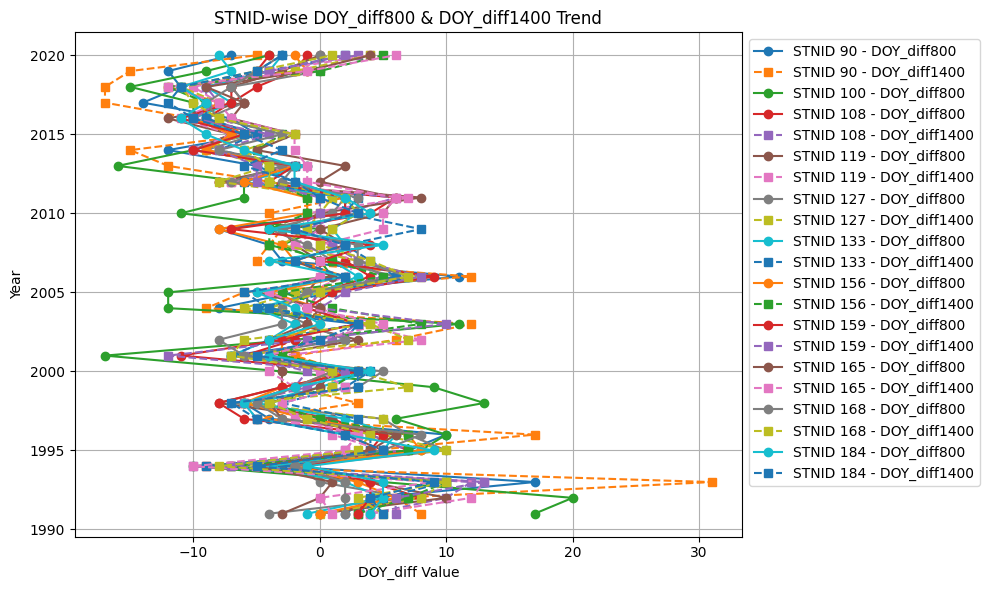

In [ ]:
## 그래프 그리기
plt.figure(figsize=(10, 6))

for stnid in sorted(stnid_list):
    ## DOY_diff800 선 그래프

    if stnid in data_800 and data_800[stnid]:
        years_sorted_800, doy_values_800 = zip(*sorted(data_800[stnid]))  ## 연도 정렬
        plt.plot(doy_values_800, years_sorted_800, marker="o", linestyle="-", label=f"STNID {stnid} - DOY_diff800")

    ## DOY_diff1400 선 그래프
    if stnid in data_1400 and data_1400[stnid]:
        years_sorted_1400, doy_values_1400 = zip(*sorted(data_1400[stnid]))  ## 연도 정렬
        plt.plot(doy_values_1400, years_sorted_1400, marker="s", linestyle="--", label=f"STNID {stnid} - DOY_diff1400")

## 그래프 설정
plt.xlabel("DOY_diff Value")
plt.ylabel("Year")
plt.title("STNID-wise DOY_diff800 & DOY_diff1400 Trend")
#plt.legend()
plt.grid(True)
#plt.gca().invert_yaxis()  ## 연도가 높은 값이 위로 가도록 설정

## 레전드를 그래프 바깥으로 이동 (오른쪽 바깥)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

## 그래프 레이아웃 조정 (여백 확보)
plt.tight_layout()

## save fig
plt.savefig(results_Dir + 'asos_1991-2020(30)_base10C_GDD_800_1400_doy_change_Lineplot.png', dpi=300)

## 그래프 출력
plt.show()

옥수수의 수정기(누적 GDD 800)에 도달한 날짜와 성숙기(누적 GDD 1400)에 도달한 날짜(doy) 차이는 유사한 것을 알 수 있습니다.  
최근 빨라지는 것을 알 수 있습니다. 관측소별 30년 차이를 평균 하겠습니다.

누적 GDD 800에 도달한 날짜의 차이를 저장한 변수와 파일, 'output_800 = "d:/2025_Phenology_S2S/results_GDD/asos_1991-2020(30)_base10C_GDD_800_Doy_Change.xlsx" '과  
누적 GDD 1400에 도달한 날짜와의 차이를 저장한 변수와 파일, 'output_1400 = "d:/2025_Phenology_S2S/results_GDD/asos_1991-2020(30)_base10C_GDD_1400_Doy_Change.xlsx" '을 기억할 것입니다.

위 두개 파일을 통해서 평균 하겠습니다.

In [ ]:
## 엑셀 파일 열기
xls2 = pd.ExcelFile(output_800)

## 모든 시트에서 데이터 수집
df_list = []

In [ ]:
for sheet_name in xls2.sheet_names:
    df = pd.read_excel(xls2, sheet_name=sheet_name, usecols=['STNID', 'Longitude_x', 'Latitude_x', 'DOY_diff800'])
    df_list.append(df)

In [ ]:
## 모든 시트의 데이터를 하나로 합치기
merged_df = pd.concat(df_list)

In [ ]:
## 지점별 평균 계산
result_df = merged_df.groupby(['STNID', 'Longitude_x', 'Latitude_x'], as_index=False)['DOY_diff800'].mean()

In [ ]:
## 컬럼명 변경
result_df.rename(columns={'DOY_diff800': 'AVG_DOY_diff800'}, inplace=True)

In [ ]:
print(result_df)

    STNID  Longitude_x  Latitude_x  AVG_DOY_diff800
0      90     128.5647     38.2509        -2.000000
1     100     128.7183     37.6771        -2.344828
2     108     126.9658     37.5714        -1.100000
3     119     126.9830     37.2575        -1.766667
4     127     127.9525     36.9705        -0.900000
5     133     127.3721     36.3720        -1.600000
6     156     126.8916     35.1729        -2.166667
7     159     129.0320     35.1047        -1.733333
8     165     126.3815     34.8173        -0.966667
9     168     127.7406     34.7393        -1.500000
10    184     126.5297     33.5141        -2.000000


In [ ]:
## 엑셀 파일 열기
xls1400 = pd.ExcelFile(output_1400)

In [ ]:
## 모든 시트에서 데이터 수집
df_list1400 = []

for sheet_name2 in xls1400.sheet_names:
    df1400 = pd.read_excel(xls1400, sheet_name=sheet_name2, usecols=['STNID', 'Longitude_x', 'Latitude_x', 'DOY_diff1400'])
    df_list1400.append(df1400)

In [ ]:
## 모든 시트의 데이터를 하나로 합치기
merged_df1400 = pd.concat(df_list1400)

## 지점별 평균 계산
result_df1400 = merged_df1400.groupby(['STNID', 'Longitude_x', 'Latitude_x'], as_index=False)['DOY_diff1400'].mean()

## 컬럼명 변경
result_df1400.rename(columns={'DOY_diff1400': 'AVG_DOY_diff1400'}, inplace=True)

In [ ]:
## 저장할 파일 이름을 입력하세요.
avg_change_output = results_Dir + "asos_1991-2020(30)_base10C_GDD_800_1400_Doy_Avg_Change.xlsx"

In [ ]:
## ExcelWriter 사용하여 두 개의 DataFrame을 서로 다른 시트로 저장
with pd.ExcelWriter(avg_change_output) as writer:
    result_df.to_excel(writer, sheet_name='avg_diff_800', index=False)
    result_df1400.to_excel(writer, sheet_name='avg_diff_1400', index=False)

print(f"엑셀 파일이 '{avg_change_output}'로 저장되었습니다.")

엑셀 파일이 '/content/gdrive/My Drive/Colab Notebooks/2025_PGA_GDD_Exercise/results_GDD/asos_1991-2020(30)_base10C_GDD_800_1400_Doy_Avg_Change.xlsx'로 저장되었습니다.


수정기에 도달한 날짜의 30년 동안의 차이의 평균과 성숙기에 도달한 날짜의 30년 동안의 차이에 대한 평균을 공간적으로 그려보겠습니다.  
몇 가지 필요한 라이브러리가 필요합니다.  
지도를 배경으로 plot할 것이므로 Basemap 라이브러리가 필요하고, 눈금 간격을 조절하기 위한 MaxNLocator 라이브러리가 필요합니다.

Basemap으로부터 지도를 plot하기 위해서는 Basemap 설치가 필요합니다. 간혹 메모리 에러로 다시 restart하는 경우도 있으므로, Basemap 설치하고 시작할 필요가 있습니다.

In [ ]:
!pip install git+https://github.com/matplotlib/basemap#subdirectory=packages/basemap

  Cloning https://github.com/matplotlib/basemap to /tmp/pip-req-build-dc9apoy4
  Running command git clone --filter=blob:none --quiet https://github.com/matplotlib/basemap /tmp/pip-req-build-dc9apoy4
  Resolved https://github.com/matplotlib/basemap to commit 461b40269088c936e2feaea12a33991bd96b63b5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import MaxNLocator

In [ ]:
## 엑셀 파일 읽기
#avg_change_file = "d:/2025_Phenology_S2S/results_GDD/asos_1991-2020(30)_base10C_GDD_800_1400_Doy_Avg_Change.xlsx"

## 엑셀 파일의 모든 시트 불러오기
#sheets = pd.read_excel(input_file, sheet_name=None)
sheet_800 = pd.read_excel(avg_change_output, sheet_name="avg_diff_800")
sheet_1400 = pd.read_excel(avg_change_output, sheet_name="avg_diff_1400")

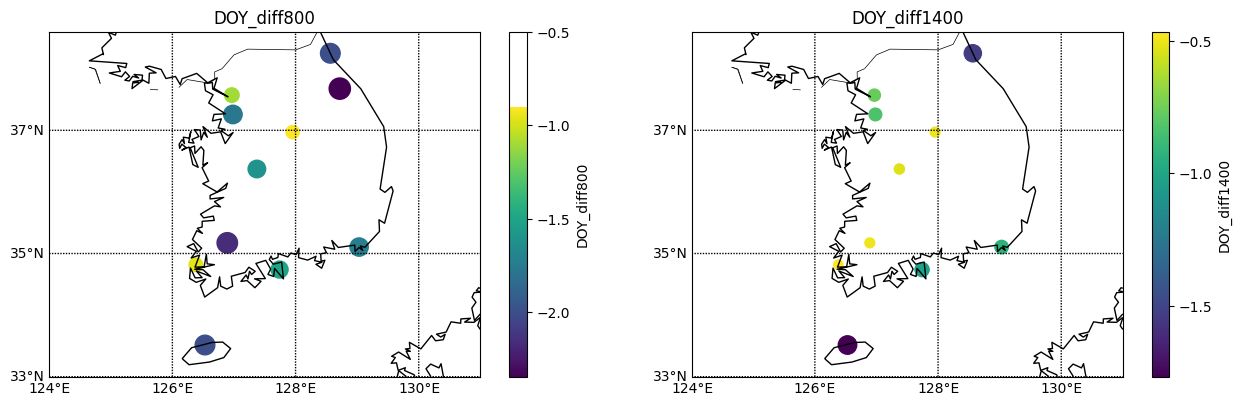

In [ ]:
## Basemap을 사용하여 한국만 보이도록 지도 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

## avg_diff_800 시트의 지도와 scatter plot
m1 = Basemap(projection='cyl',
             llcrnrlat=33.0, urcrnrlat=38.6,  ## 위도 범위 (한국)
             llcrnrlon=124, urcrnrlon=131,  ## 경도 범위 (한국)
             resolution='l', ax=ax1)
m1.drawcoastlines()
m1.drawcountries()
#m1.drawmapboundary(fill_color='aqua')
#m1.fillcontinents(color='lightgreen', lake_color='aqua')
m1.drawparallels(range(33, 39, 2), labels=[1, 0, 0, 0])
m1.drawmeridians(range(124, 132, 2), labels=[0, 0, 0, 1])

## scatter plot (DOY_diff800에 따라 크기와 색상 조정)
scatter_800 = m1.scatter(
    sheet_800["Longitude_x"],
    sheet_800["Latitude_x"],
    c=sheet_800["AVG_DOY_diff800"],
    s=sheet_800["AVG_DOY_diff800"].abs() * 100,  ## 크기 설정
    cmap='viridis', latlon=True
)

## cbar 추가 및 눈금 범위 설정
#cbar_800 = fig.colorbar(scatter_800, ax=ax1, label='DOY_diff800')
#cbar_800.set_ticks(MaxNLocator(interval=0.5).tick_values(cbar_800.get_ticks()[0], cbar_800.get_ticks()[-1]))
#cbar_800 = fig.colorbar(scatter_800, ax=ax1, label='DOY_diff800')
#cbar_800.locator = MaxNLocator(integer=True, prune='lower', interval=0.5)  ## 눈금 간격을 0.5로 설정
#cbar_800.update_ticks()
cbar_800 = fig.colorbar(scatter_800, ax=ax1, label='DOY_diff800')
cbar_800.locator = MaxNLocator(integer=True, prune='lower')  ## 눈금 간격 설정
cbar_800.set_ticks([x * 0.5 for x in range(int(cbar_800.get_ticks()[0] * 2), int(cbar_800.get_ticks()[-1] * 2))])  ## 0.5 간격 설정


ax1.set_title("DOY_diff800")

## avg_diff_1400 시트의 지도와 scatter plot
m2 = Basemap(projection='cyl',
             llcrnrlat=33.0, urcrnrlat=38.6,  ## 위도 범위 (한국)
             llcrnrlon=124, urcrnrlon=131,  ## 경도 범위 (한국)
             resolution='l', ax=ax2)
m2.drawcoastlines()
m2.drawcountries()
#m2.drawmapboundary(fill_color='aqua')
#m2.fillcontinents(color='lightgreen', lake_color='aqua')
m2.drawparallels(range(33, 39, 2), labels=[1, 0, 0, 0])
m2.drawmeridians(range(124, 132, 2), labels=[0, 0, 0, 1])

## scatter plot (DOY_diff1400에 따라 크기와 색상 조정)
scatter_1400 = m2.scatter(
    sheet_1400["Longitude_x"],
    sheet_1400["Latitude_x"],
    c=sheet_1400["AVG_DOY_diff1400"],
    s=sheet_1400["AVG_DOY_diff1400"].abs() * 100,  ## 크기 설정
    cmap='viridis', latlon=True
)

## cbar 추가 및 눈금 범위 설정
#cbar_1400 = fig.colorbar(scatter_1400, ax=ax2, label='DOY_diff1400')
#cbar_1400.set_ticks(MaxNLocator(interval=0.5).tick_values(cbar_1400.get_ticks()[0], cbar_1400.get_ticks()[-1]))
#cbar_1400 = fig.colorbar(scatter_1400, ax=ax2, label='DOY_diff1400')
#cbar_1400.locator = MaxNLocator(integer=True, prune='lower', interval=0.5)  ## 눈금 간격을 0.5로 설정
#cbar_1400.update_ticks()
cbar_1400 = fig.colorbar(scatter_1400, ax=ax2, label='DOY_diff1400')
cbar_1400.locator = MaxNLocator(integer=True, prune='lower')  ## 눈금 간격 설정
cbar_1400.set_ticks([x * 0.5 for x in range(int(cbar_1400.get_ticks()[0] * 2), int(cbar_1400.get_ticks()[-1] * 2))])  ## 0.5 간격 설정


ax2.set_title("DOY_diff1400")

## save fig
plt.savefig(results_Dir + 'asos_1991-2020(30)_base10C_GDD_800_1400_doy_avg_change_Scatterplot.png', dpi=300)

plt.tight_layout()
plt.show()

30년 차이의 평균이 2일로 드라마틱하게 크지 않아서 그림이 예쁘지(드라마틱하지) 않습니다.
앞서 선 그래프에서 본 것과 같이, 차이가 -10에서 20일 이상의 차이로 매년 누적 GDD의 평년 대비 차이는 드라마틱합니다.  
그러나, 30년 평균을 예상과 달리 드라마틱하게 크지 않았습니다.
의견은, GDD는 생육단계 (phenological events)를 온도로 계산하고 누적 GDD 값의 임계치도 대략적이기 때문입니다.

한번 모든 차이를 공간 scatter로 그려보세요. 아래 그림처럼.  
관련 코드는 GitHub에 올려두겠습니다.

30년 평균 차이: 30개 연도를 한번에 Scatter한 경우:  

<img src = "https://drive.google.com/uc?id=1PO9rcjjYEKwT5VdmNeofmM5SN7sd49Rj" height="525" width="800"/>

Basemap을 Scatter와 함께 plot한 경우:  

<img src = "https://drive.google.com/uc?id=1WjzDsvwqlKSHzAsyjxlFZouXrpGKMtkQ" height="525" width="800"/>